# Tratamiento de los datos

## Imoportación de los datos

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

df = pd.read_csv("../Data/Raw/historical_tech_stocks.csv")
df.head()

,Date,Ticker,Open,High,Low,Close,Volume
0,2016-01-04,AAPL,23.184077,23.807681,23.046251,23.803162,270597600
1,2016-01-05,AAPL,23.893544,23.916138,23.138893,23.206675,223164000
2,2016-01-06,AAPL,22.720890,23.129849,22.564990,22.752522,273829600
3,2016-01-07,AAPL,22.296124,22.623742,21.787751,21.792269,324377600
4,2016-01-08,AAPL,22.266747,22.393275,21.862307,21.907495,283192000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30940 entries, 0 to 30939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    30940 non-null  object 
 1   Ticker  30940 non-null  object 
 2   Open    30940 non-null  float64
 3   High    30940 non-null  float64
 4   Low     30940 non-null  float64
 5   Close   30940 non-null  float64
 6   Volume  30940 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 1.7+ MB


In [7]:
df.describe()

,Open,High,Low,Close,Volume
count,30940.000000,30940.000000,30940.000000,30940.000000,3.094000e+04
mean,169.813032,172.315094,167.207544,169.823225,6.777797e+07
std,295.767217,300.488314,290.559999,295.652647,1.422832e+08
min,0.604516,0.623544,0.603784,0.615250,1.049000e+05
25%,39.981855,40.386720,39.556033,39.964072,8.849825e+06
50%,88.447461,89.646404,87.088230,88.436665,2.368480e+07
75%,169.398811,171.500913,167.424431,169.614761,5.565975e+07
max,2606.000000,2635.879883,2582.000000,2606.010010,3.692928e+09


In [8]:
df.describe(include=object)

,Date,Ticker
count,30940,30940
unique,2380,13
top,2016-01-04,AAPL
freq,13,2380


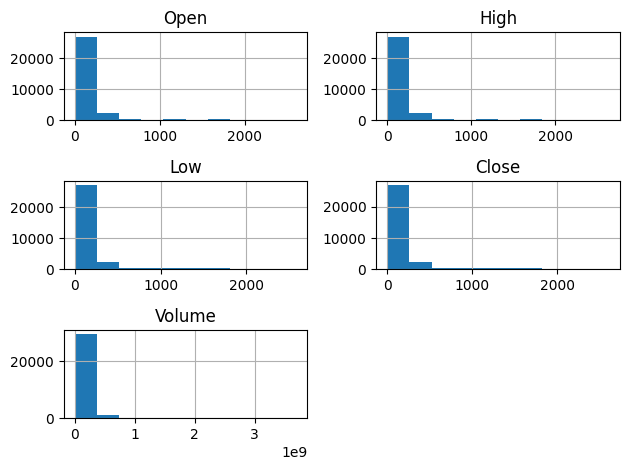

In [10]:
df.hist()
plt.tight_layout()

In [11]:
df["Ticker"].unique()

array(['AAPL', 'AMD', 'AMZN', 'CRM', 'GOOGL', 'INTC', 'MELI', 'META',
       'MSFT', 'NVDA', 'ORCL', 'PANW', 'SHOP'], dtype=object)

In [16]:
# Celda 2: Definir rutas de archivos y cargar los datos brutos

# Asegúrate de que tu archivo CSV esté en la carpeta 'data/raw'
RAW_DATA_FILENAME = '../Data/Raw/historical_tech_stocks.csv' # ¡Cambia esto al nombre de tu archivo!
PROCESSED_DATA_FILENAME = '../Data/Proccesed/mis_datos_acciones_processed.csv'

RAW_DATA_PATH = os.path.join(RAW_DATA_FILENAME)
PROCESSED_DATA_PATH = os.path.join(PROCESSED_DATA_FILENAME)

# Asegúrate de que las carpetas existan
os.makedirs('../Data/Raw', exist_ok=True)
os.makedirs('../Data/Processed', exist_ok=True)

print(f"Intentando cargar datos desde: {RAW_DATA_PATH}")

try:
    df_raw = pd.read_csv(RAW_DATA_PATH)
    print("Datos brutos cargados exitosamente.")
    print("\nPrimeras 5 filas del DataFrame bruto:")
    display(df_raw.head())
    print("\nInformación del DataFrame bruto:")
    df_raw.info()
except FileNotFoundError:
    print(f"ERROR: El archivo '{RAW_DATA_PATH}' no se encontró. "
          f"Por favor, asegúrate de colocar tu CSV en la carpeta 'data/raw/'.")
    # Crea un DataFrame de ejemplo si el archivo no existe para poder continuar
    # REMUEVE ESTO CUANDO TENGAS TUS DATOS REALES
    data = {
        'Date': pd.to_datetime(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-01', '2023-01-02', '2023-01-04']),
        'Ticker': ['AAPL', 'AAPL', 'AAPL', 'GOOG', 'GOOG', 'AAPL'],
        'Open': [100.0, 101.0, 102.0, 200.0, 201.0, 103.0],
        'High': [102.0, 103.0, 104.0, 202.0, 203.0, 105.0],
        'Low': [99.0, 100.0, 101.0, 199.0, 200.0, 102.0],
        'Close': [101.5, 102.5, 103.5, 201.5, 202.5, 104.5],
        'Volume': [10000, 12000, 11000, 5000, 6000, 13000]
    }
    df_raw = pd.DataFrame(data)
    # Guarda el ejemplo para que se vea que funciona
    df_raw.to_csv(RAW_DATA_PATH, index=False)
    print("\nSe ha creado un archivo CSV de ejemplo para continuar la ejecución.")
    display(df_raw.head())
    df_raw.info()

# Crear una copia para trabajar en ella y mantener el original inalterado
df_processed = df_raw.copy()

Intentando cargar datos desde: ../Data/Raw/historical_tech_stocks.csv
Datos brutos cargados exitosamente.

Primeras 5 filas del DataFrame bruto:


,Date,Ticker,Open,High,Low,Close,Volume
0,2016-01-04,AAPL,23.184077,23.807681,23.046251,23.803162,270597600
1,2016-01-05,AAPL,23.893544,23.916138,23.138893,23.206675,223164000
2,2016-01-06,AAPL,22.720890,23.129849,22.564990,22.752522,273829600
3,2016-01-07,AAPL,22.296124,22.623742,21.787751,21.792269,324377600
4,2016-01-08,AAPL,22.266747,22.393275,21.862307,21.907495,283192000



Información del DataFrame bruto:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30940 entries, 0 to 30939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    30940 non-null  object 
 1   Ticker  30940 non-null  object 
 2   Open    30940 non-null  float64
 3   High    30940 non-null  float64
 4   Low     30940 non-null  float64
 5   Close   30940 non-null  float64
 6   Volume  30940 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
# Celda 3: Preprocesamiento de la columna 'Date' y establecimiento del índice

print("Paso 1: Convirtiendo la columna 'Date' a formato datetime y estableciendo como índice.")
df_processed['Date'] = pd.to_datetime(df_processed['Date'], errors='coerce')

# Eliminar filas donde la fecha no pudo ser parseada (se convirtieron a NaT)
initial_rows = len(df_processed)
df_processed.dropna(subset=['Date'], inplace=True)
rows_after_date_drop = len(df_processed)
if initial_rows - rows_after_date_drop > 0:
    print(f"  - Eliminadas {initial_rows - rows_after_date_drop} filas con fechas inválidas.")

df_processed.set_index('Date', inplace=True)
print("  - 'Date' establecida como índice.")

print("\nPrimeras filas con 'Date' como índice:")
display(df_processed.head())
print("\nInformación después de establecer 'Date' como índice:")
df_processed.info()

Paso 1: Convirtiendo la columna 'Date' a formato datetime y estableciendo como índice.
  - 'Date' establecida como índice.

Primeras filas con 'Date' como índice:


,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2016-01-04,AAPL,23.184077,23.807681,23.046251,23.803162,270597600
2016-01-05,AAPL,23.893544,23.916138,23.138893,23.206675,223164000
2016-01-06,AAPL,22.720890,23.129849,22.564990,22.752522,273829600
2016-01-07,AAPL,22.296124,22.623742,21.787751,21.792269,324377600
2016-01-08,AAPL,22.266747,22.393275,21.862307,21.907495,283192000



Información después de establecer 'Date' como índice:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30940 entries, 2016-01-04 to 2025-06-20
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  30940 non-null  object 
 1   Open    30940 non-null  float64
 2   High    30940 non-null  float64
 3   Low     30940 non-null  float64
 4   Close   30940 non-null  float64
 5   Volume  30940 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.7+ MB


In [18]:
# Celda 4: Normalización de Husos Horarios (Timezones)

# Es fundamental trabajar con UTC para trading.
# Ajusta 'UTC' si tus datos tienen una zona horaria diferente que quieras mantener
# o si ya sabes que están en una zona horaria específica y sin tzinfo.
TARGET_TIMEZONE = 'UTC'

print(f"Paso 2: Normalizando los timestamps a '{TARGET_TIMEZONE}'.")
if df_processed.index.tz is None:
    # Si el índice no tiene información de zona horaria, asumimos que está en UTC
    # y la "localizamos" como UTC. Si sabes que está en otro TZ (ej. 'America/New_York'),
    # usa df_processed.index.tz_localize('America/New_York') antes de tz_convert.
    df_processed.index = df_processed.index.tz_localize(TARGET_TIMEZONE)
    print(f"  - Índice localizado como '{TARGET_TIMEZONE}' (asumido).")
else:
    # Si el índice ya tiene info de TZ, lo convertimos al target TZ
    df_processed.index = df_processed.index.tz_convert(TARGET_TIMEZONE)
    print(f"  - Índice convertido a '{TARGET_TIMEZONE}'.")

print("\nPrimeras filas con 'Date' en la zona horaria objetivo:")
display(df_processed.head())
print("\nInformación después de normalizar el huso horario:")
df_processed.info()

Paso 2: Normalizando los timestamps a 'UTC'.
  - Índice localizado como 'UTC' (asumido).

Primeras filas con 'Date' en la zona horaria objetivo:


,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2016-01-04 00:00:00+00:00,AAPL,23.184077,23.807681,23.046251,23.803162,270597600
2016-01-05 00:00:00+00:00,AAPL,23.893544,23.916138,23.138893,23.206675,223164000
2016-01-06 00:00:00+00:00,AAPL,22.720890,23.129849,22.564990,22.752522,273829600
2016-01-07 00:00:00+00:00,AAPL,22.296124,22.623742,21.787751,21.792269,324377600
2016-01-08 00:00:00+00:00,AAPL,22.266747,22.393275,21.862307,21.907495,283192000



Información después de normalizar el huso horario:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30940 entries, 2016-01-04 00:00:00+00:00 to 2025-06-20 00:00:00+00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  30940 non-null  object 
 1   Open    30940 non-null  float64
 2   High    30940 non-null  float64
 3   Low     30940 non-null  float64
 4   Close   30940 non-null  float64
 5   Volume  30940 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.7+ MB


In [19]:
# Celda 5: Ordenar datos y verificar/convertir tipos de datos

print("Paso 3: Ordenando datos y verificando tipos.")

# Ordenar por Ticker y luego por fecha para asegurar consistencia
df_processed.sort_values(by=['Ticker', 'Date'], inplace=True)
print("  - Datos ordenados por 'Ticker' y 'Date'.")

# Asegurarse de que las columnas numéricas sean float/int y manejar NaNs si los hay
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in numeric_cols:
    if df_processed[col].dtype == 'object':
        # Intentar convertir a numérico, errores se convertirán en NaN
        df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
        print(f"  - Columna '{col}' convertida a tipo numérico.")

    # Manejar NaNs en columnas numéricas después de la conversión
    # Para precios, ffill es común. Para volumen, 0 es sensato.
    if df_processed[col].isnull().any():
        nan_count = df_processed[col].isnull().sum()
        if col in ['Open', 'High', 'Low', 'Close']:
            # Rellenar con el último valor válido para precios
            df_processed[col].fillna(method='ffill', inplace=True)
            print(f"  - Rellenados {nan_count} NaNs en '{col}' con ffill.")
        elif col == 'Volume':
            # Rellenar volumen con 0
            df_processed[col].fillna(0, inplace=True)
            print(f"  - Rellenados {nan_count} NaNs en '{col}' con 0.")

# Eliminar filas que aún puedan tener NaNs después de ffill (ej. al inicio de la serie)
initial_rows = len(df_processed)
df_processed.dropna(subset=numeric_cols, inplace=True)
rows_after_nan_drop = len(df_processed)
if initial_rows - rows_after_nan_drop > 0:
    print(f"  - Eliminadas {initial_rows - rows_after_nan_drop} filas con NaNs remanentes en columnas numéricas.")

print("\nInformación después de ordenar y verificar tipos:")
df_processed.info()

Paso 3: Ordenando datos y verificando tipos.
  - Datos ordenados por 'Ticker' y 'Date'.

Información después de ordenar y verificar tipos:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30940 entries, 2016-01-04 00:00:00+00:00 to 2025-06-20 00:00:00+00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  30940 non-null  object 
 1   Open    30940 non-null  float64
 2   High    30940 non-null  float64
 3   Low     30940 non-null  float64
 4   Close   30940 non-null  float64
 5   Volume  30940 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.7+ MB


In [22]:
# Celda 6: División y procesamiento por Ticker (creando MultiIndex)

# Define la frecuencia deseada para tu estrategia (ej. '1D' para diario, '1H' para horario)
# IMPORTANTE: La frecuencia debe ser igual o más grande que la granularidad de tus datos RAW.
TARGET_FREQUENCY = '1D' # Ejemplo: para datos diarios

print(f"Paso 4: Procesando datos por ticker y re-sampleando a '{TARGET_FREQUENCY}'.")

processed_dfs_by_ticker = []
unique_tickers = df_processed['Ticker'].unique()
print(f"  - Detectados {len(unique_tickers)} tickers: {', '.join(unique_tickers)}")

for ticker in unique_tickers:
    print(f"\nProcesando ticker: {ticker}...")
    df_ticker = df_processed[df_processed['Ticker'] == ticker].copy()
    
    # Eliminar la columna Ticker ya que ahora lo manejamos por grupo
    df_ticker.drop(columns=['Ticker'], inplace=True)

    # Re-sampling a la frecuencia deseada
    # Esto también manejará duplicados de timestamp automáticamente (tomará el primero/ultimo/max/min)
    ohlcv_agg_rules = {
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Volume': 'sum'
    }

    # Aplicar re-sampling y agregación
    # .apply con pd.Series es más robusto para manejar períodos vacíos
    df_resampled = df_ticker.resample(TARGET_FREQUENCY).apply(lambda x: pd.Series({
        'Open': x['Open'].iloc[0] if not x['Open'].empty else np.nan,
        'High': x['High'].max() if not x['High'].empty else np.nan,
        'Low': x['Low'].min() if not x['Low'].empty else np.nan,
        'Close': x['Close'].iloc[-1] if not x['Close'].empty else np.nan,
        'Volume': x['Volume'].sum() if not x['Volume'].empty else np.nan
    }))

    # Manejar NaNs después del re-sampling (por gaps, por ejemplo)
    # Rellenamos OHLC con el último valor conocido. Volumen 0.
    df_resampled['Open'].fillna(method='ffill', inplace=True)
    df_resampled['High'].fillna(method='ffill', inplace=True)
    df_resampled['Low'].fillna(method='ffill', inplace=True)
    df_resampled['Close'].fillna(method='ffill', inplace=True)
    df_resampled['Volume'].fillna(0, inplace=True)

    # Eliminar filas que aún sean NaN al inicio (si no hubo datos previos para ffill)
    initial_resampled_rows = len(df_resampled)
    df_resampled.dropna(inplace=True)
    rows_after_resample_nan_drop = len(df_resampled)
    if initial_resampled_rows - rows_after_resample_nan_drop > 0:
        print(f"  - Eliminadas {initial_resampled_rows - rows_after_resample_nan_drop} filas NaN del inicio para {ticker}.")

    # Asignar el nombre del ticker al DataFrame procesado para el MultiIndex
    df_resampled.name = ticker
    processed_dfs_by_ticker.append(df_resampled)

# Concatenar todos los DataFrames procesados en uno solo con MultiIndex
if processed_dfs_by_ticker:
    df_final_processed = pd.concat(processed_dfs_by_ticker, keys=[df_temp.name for df_temp in processed_dfs_by_ticker], names=['Ticker', 'Date'])
    # Reordenar las columnas para OHLCV al final si es necesario
    ohlcv_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
    other_cols = [col for col in df_final_processed.columns if col not in ohlcv_cols]
    df_final_processed = df_final_processed[ohlcv_cols + other_cols] # OHLCV primero
    print("\nTodos los tickers procesados y concatenados en un DataFrame con MultiIndex.")
else:
    df_final_processed = pd.DataFrame() # DataFrame vacío si no hay tickers

print("\nPrimeras 10 filas del DataFrame final procesado (MultiIndex):")
display(df_final_processed.head(10))
print("\nInformación del DataFrame final procesado:")
df_final_processed.info()

Paso 4: Procesando datos por ticker y re-sampleando a '1D'.
  - Detectados 13 tickers: AAPL, AMD, AMZN, CRM, GOOGL, INTC, MELI, META, MSFT, NVDA, ORCL, PANW, SHOP

Procesando ticker: AAPL...


/tmp/ipykernel_9205/922447566.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_resampled['Open'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_9205/922447566.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_resampled['Open'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_9205/922447566.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace me


Procesando ticker: AMD...


/tmp/ipykernel_9205/922447566.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_resampled['Open'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_9205/922447566.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_resampled['Open'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_9205/922447566.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace me


Procesando ticker: AMZN...


/tmp/ipykernel_9205/922447566.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_resampled['Open'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_9205/922447566.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_resampled['Open'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_9205/922447566.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace me


Procesando ticker: CRM...


/tmp/ipykernel_9205/922447566.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_resampled['Open'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_9205/922447566.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_resampled['Open'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_9205/922447566.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace me


Procesando ticker: GOOGL...


/tmp/ipykernel_9205/922447566.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_resampled['Open'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_9205/922447566.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_resampled['Open'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_9205/922447566.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace me


Procesando ticker: INTC...


/tmp/ipykernel_9205/922447566.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_resampled['Open'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_9205/922447566.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_resampled['Open'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_9205/922447566.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace me


Procesando ticker: MELI...


/tmp/ipykernel_9205/922447566.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_resampled['Open'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_9205/922447566.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_resampled['Open'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_9205/922447566.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace me


Procesando ticker: META...


/tmp/ipykernel_9205/922447566.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_resampled['Open'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_9205/922447566.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_resampled['Open'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_9205/922447566.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace me


Procesando ticker: MSFT...


/tmp/ipykernel_9205/922447566.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_resampled['Open'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_9205/922447566.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_resampled['Open'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_9205/922447566.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace me


Procesando ticker: NVDA...


/tmp/ipykernel_9205/922447566.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_resampled['Open'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_9205/922447566.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_resampled['Open'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_9205/922447566.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace me


Procesando ticker: ORCL...


/tmp/ipykernel_9205/922447566.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_resampled['Open'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_9205/922447566.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_resampled['Open'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_9205/922447566.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace me


Procesando ticker: PANW...


/tmp/ipykernel_9205/922447566.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_resampled['Open'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_9205/922447566.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_resampled['Open'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_9205/922447566.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace me


Procesando ticker: SHOP...

Todos los tickers procesados y concatenados en un DataFrame con MultiIndex.

Primeras 10 filas del DataFrame final procesado (MultiIndex):


/tmp/ipykernel_9205/922447566.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_resampled['Open'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_9205/922447566.py:42: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_resampled['Open'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_9205/922447566.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace me

Open       High        Low      Close       Volume
Ticker Date                                                                              
AAPL   2016-01-04 00:00:00+00:00  23.184077  23.807681  23.046251  23.803162  270597600.0
       2016-01-05 00:00:00+00:00  23.893544  23.916138  23.138893  23.206675  223164000.0
       2016-01-06 00:00:00+00:00  22.720890  23.129849  22.564990  22.752522  273829600.0
       2016-01-07 00:00:00+00:00  22.296124  22.623742  21.787751  21.792269  324377600.0
       2016-01-08 00:00:00+00:00  22.266747  22.393275  21.862307  21.907495  283192000.0
       2016-01-09 00:00:00+00:00  22.266747  22.393275  21.862307  21.907495          0.0
       2016-01-10 00:00:00+00:00  22.266747  22.393275  21.862307  21.907495          0.0
       2016-01-11 00:00:00+00:00  22.361640  22.381974  21.993351  22.262224  198957600.0
       2016-01-12 00:00:00+00:00  22.718635  22.750267  22.332270  22.585327  196616800.0
       2016-01-13 00:00:00+00:00  22.666667  22.863239  21.984318  22.004652  249758400.0


Información del DataFrame final procesado:
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 44928 entries, ('AAPL', Timestamp('2016-01-04 00:00:00+0000', tz='UTC')) to ('SHOP', Timestamp('2025-06-20 00:00:00+0000', tz='UTC'))
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    44928 non-null  float64
 1   High    44928 non-null  float64
 2   Low     44928 non-null  float64
 3   Close   44928 non-null  float64
 4   Volume  44928 non-null  float64
dtypes: float64(5)
memory usage: 2.0+ MB


In [23]:
# Celda 7: Verificación final de consistencia OHLC y manejo de "Outliers" Lógicos

print("Paso 5: Verificación de consistencia OHLC.")

# Identificar filas donde Low > High o Open/Close están fuera del rango [Low, High]
invalid_ohlc_mask = ~(
    (df_final_processed['Low'] <= df_final_processed['Open']) &
    (df_final_processed['Low'] <= df_final_processed['Close']) &
    (df_final_processed['High'] >= df_final_processed['Open']) &
    (df_final_processed['High'] >= df_final_processed['Close'])
)

invalid_ohlc_rows = df_final_processed[invalid_ohlc_mask]

if not invalid_ohlc_rows.empty:
    print(f"  - Advertencia: Se encontraron {len(invalid_ohlc_rows)} filas con inconsistencias OHLC lógicas.")
    print("    Ejemplos de filas inconsistentes:")
    display(invalid_ohlc_rows.head())
    # Opcional: Eliminar estas filas si estás seguro de que son errores de datos.
    # df_final_processed = df_final_processed[~invalid_ohlc_mask].copy()
    # print(f"  - Filas inconsistentes eliminadas. Nuevo tamaño: {len(df_final_processed)}")
else:
    print("  - No se encontraron inconsistencias OHLC lógicas.")

# --- CONSIDERACIONES SOBRE OUTLIERS "REALES" ---
print("\nConsideración sobre 'outliers' reales (spikes de precio/volumen):")
print("  - No se eliminarán automáticamente los picos o caídas extremas en precios/volúmenes,")
print("    ya que a menudo son eventos de mercado reales. Tu estrategia debe ser robusta a ellos.")
print("  - Si encuentras valores que son claramente errores (ej. precios que son 0 o negativos),")
print("    asegúrate de que los pasos anteriores los hayan manejado (ver Celda 5).")

Paso 5: Verificación de consistencia OHLC.
  - No se encontraron inconsistencias OHLC lógicas.

Consideración sobre 'outliers' reales (spikes de precio/volumen):
  - No se eliminarán automáticamente los picos o caídas extremas en precios/volúmenes,
    ya que a menudo son eventos de mercado reales. Tu estrategia debe ser robusta a ellos.
  - Si encuentras valores que son claramente errores (ej. precios que son 0 o negativos),
    asegúrate de que los pasos anteriores los hayan manejado (ver Celda 5).


In [24]:
# Celda 8: Guardar los datos procesados

print(f"Paso 6: Guardando los datos procesados en '{PROCESSED_DATA_PATH}'.")

if isinstance(df_final_processed.index, pd.MultiIndex):
    # Para MultiIndex, guardar el índice es crucial
    df_final_processed.to_csv(PROCESSED_DATA_PATH, index=True, index_label=df_final_processed.index.names)
else:
    df_final_processed.to_csv(PROCESSED_DATA_PATH, index=True)

print("\nProceso de limpieza y preparación de datos completado.")
print("\nInformación final del DataFrame procesado:")
df_final_processed.info()
print("\nPrimeras 5 filas del DataFrame procesado final:")
display(df_final_processed.head())

Paso 6: Guardando los datos procesados en '../Data/Proccesed/mis_datos_acciones_processed.csv'.

Proceso de limpieza y preparación de datos completado.

Información final del DataFrame procesado:
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 44928 entries, ('AAPL', Timestamp('2016-01-04 00:00:00+0000', tz='UTC')) to ('SHOP', Timestamp('2025-06-20 00:00:00+0000', tz='UTC'))
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    44928 non-null  float64
 1   High    44928 non-null  float64
 2   Low     44928 non-null  float64
 3   Close   44928 non-null  float64
 4   Volume  44928 non-null  float64
dtypes: float64(5)
memory usage: 2.0+ MB

Primeras 5 filas del DataFrame procesado final:


Open       High        Low      Close       Volume
Ticker Date                                                                              
AAPL   2016-01-04 00:00:00+00:00  23.184077  23.807681  23.046251  23.803162  270597600.0
       2016-01-05 00:00:00+00:00  23.893544  23.916138  23.138893  23.206675  223164000.0
       2016-01-06 00:00:00+00:00  22.720890  23.129849  22.564990  22.752522  273829600.0
       2016-01-07 00:00:00+00:00  22.296124  22.623742  21.787751  21.792269  324377600.0
       2016-01-08 00:00:00+00:00  22.266747  22.393275  21.862307  21.907495  283192000.0